In [ ]:
# SEE:  https://matthewearl.github.io/2015/07/28/switching-eds-with-python/

In [1]:
import sys

sys.path.append('/usr/local/lib/python2.7/site-packages')

import os
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import copy

In [2]:
# import optparse

# parser = optparse.OptionParser()

# parser.add_option('--i', '--image', action="store", dest="image",
#                   default="", help="Path to the image")

# parser.add_option('--O', '--outpath', action="store", dest="outpath",
#                   default="/tmp", help="Path to the save ROIs")

# parser.add_option('--C', '--crop', action="store_true", dest="crop", default=False, help="Path to save ROI")

# (options, args) = parser.parse_args()

# global cropROI

# image = cv2.imread(options.image)
# outpath = options.outpath
# cropROI = options.crop


In [3]:
# Get REFERENCE:
img1 = cv2.imread('./images/REF.tif', cv2.CV_LOAD_IMAGE_GRAYSCALE)

In [153]:
# Get SAMPLE:
# img2 = cv2.imread('./images/tests/lens_BW_500ms.png', cv2.CV_LOAD_IMAGE_GRAYSCALE)

fim = 'lens_RGB_500ms.png'
img2 = cv2.imread('./images/tests/%s' % fim, cv2.CV_LOAD_IMAGE_GRAYSCALE)

In [138]:
REF = img1 #img1
SAMPLE = img2 #img2

print REF.shape
print SAMPLE.shape

(164, 218)
(768, 1024)


In [139]:
# refPt = []
# refPt_pre = []
# cropping = False

def click_and_crop(event, x, y, flags, param):
    # grab references to the global variables
    global refPt, cropping, refPt_pre, cropROI

    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being
    # performed
#     if cropROI is False:
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt.append((x, y))
        cv2.circle(image, refPt[-1], 1, (0,0,255), -1)
        cv2.imshow("image", image)

#     else:
#         if event == cv2.EVENT_LBUTTONDOWN:
#             refPt = [(x, y)]
#             cropping = True

#         # check to see if the left mouse button was released
#         elif event == cv2.EVENT_LBUTTONUP:
#             # record the ending (x, y) coordinates and indicate that
#             # the cropping operation is finished
#             refPt.append((x, y))
#             cropping = False

#             # draw a rectangle around the region of interest
#             cv2.rectangle(image, refPt[0], refPt[1], (0, 255, 0), 2)
#             cv2.imshow("image", image)

#         if not refPt == refPt_pre:
#             print refPt
#             refPt_pre = refPt

In [140]:
# First get REF points:

image = copy.copy(REF)


In [141]:
# GET POINTS:

refPt = []
refPt_pre = []
cropping = False

clone = image.copy()

cv2.startWindowThread()
cv2.namedWindow("image")
cv2.setMouseCallback("image", click_and_crop)

# keep looping until the 'q' key is pressed

while True:
    # display the image and wait for a keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # if the 'r' key is pressed, reset the cropping region
    if key == ord("r"):
        image = clone.copy()
        refPt = []

    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break

# close all open windows
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

[(27, 51), (21, 104), (166, 68)]


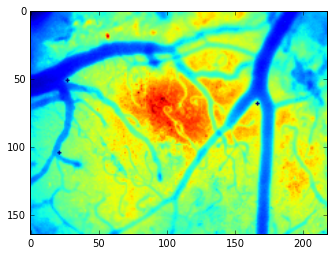

In [142]:
# DISPLAY REF IMAGE:
print refPt
plt.imshow(image) #, cmap='gray')

pts1 = copy.copy(refPt)

# for i in refPt:
#     plt.plot(i, 'r*')

In [143]:
# NOW, get SAMPLE:

image = copy.copy(SAMPLE)

# GET POINTS:

refPt = []
refPt_pre = []
cropping = False

clone = image.copy()

cv2.startWindowThread()
cv2.namedWindow("image")
cv2.setMouseCallback("image", click_and_crop)

# keep looping until the 'q' key is pressed

while True:
    # display the image and wait for a keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # if the 'r' key is pressed, reset the cropping region
    if key == ord("r"):
        image = clone.copy()
        refPt = []

    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break

# close all open windows
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

[(336, 321), (331, 434), (665, 342)]


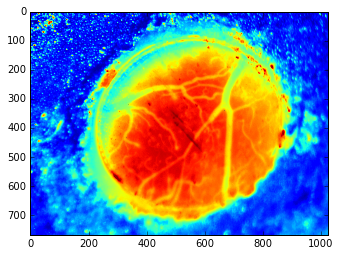

In [144]:
# DISPLAY SAMPLE IMAGE:
print refPt
plt.imshow(image) #, cmap='gray')

pts2 = refPt #copy.copy(refPt)

# for i in refPt:
#     plt.plot(i, 'r*')

In [145]:
print pts1
print pts2

[(27, 51), (21, 104), (166, 68)]
[(336, 321), (331, 434), (665, 342)]


In [146]:
# TRY THIS WITH SVD:
# see:  https://matthewearl.github.io/2015/07/28/switching-eds-with-python/

def transformation_from_points(points1, points2):
    points1 = points1.astype(np.float64)
    points2 = points2.astype(np.float64)

    c1 = np.mean(points1, axis=0)
    c2 = np.mean(points2, axis=0)
    points1 -= c1
    points2 -= c2

    s1 = np.std(points1)
    s2 = np.std(points2)
    points1 /= s1
    points2 /= s2

    U, S, Vt = np.linalg.svd(points1.T * points2)
    R = (U * Vt).T

    return np.vstack([np.hstack(((s2 / s1) * R,
                                       c2.T - (s2 / s1) * R * c1.T)),
                         np.matrix([0., 0., 1.])])

def warp_im(im, M, dshape):
    output_im = np.zeros(dshape, dtype=im.dtype)
    cv2.warpAffine(im,
                   M[:2],
                   (dshape[1], dshape[0]),
                   dst=output_im,
                   borderMode=cv2.BORDER_TRANSPARENT,
                   flags=cv2.WARP_INVERSE_MAP)
    return output_im


In [147]:

mat1 = np.matrix([i for i in pts1])
mat2 = np.matrix([i for i in pts2])
M = transformation_from_points(mat2, mat1)

In [148]:
# out = warp_im(SAMPLE, M, REF.shape)
out = warp_im(REF, M, SAMPLE.shape)


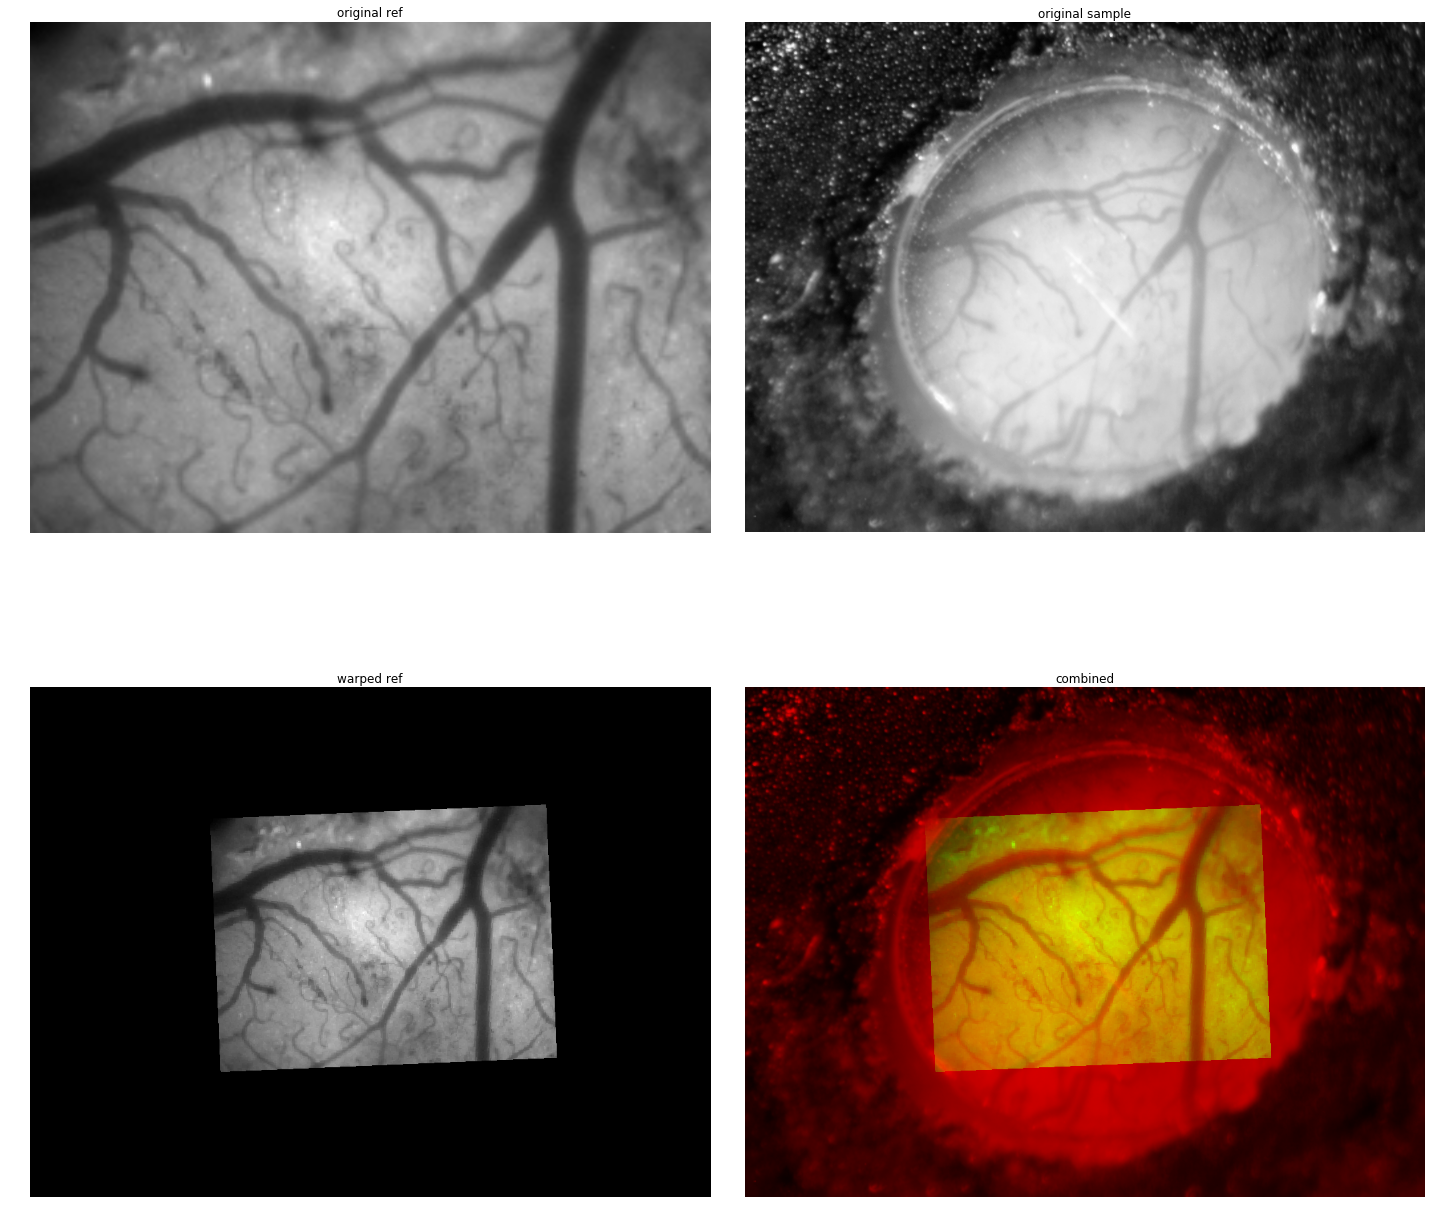

In [155]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(REF, cmap='gray')
plt.axis('off')
plt.title('original ref')

plt.subplot(222)
plt.imshow(SAMPLE, cmap='gray')
plt.axis('off')
plt.title('original sample')

plt.subplot(223)
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.title('warped ref')

plt.subplot(224)
# plt.imshow(SAMPLE, cmap='gray')
# plt.imshow(out, cmap='jet', alpha=0.2)
merged = np.zeros((SAMPLE.shape[0], SAMPLE.shape[1], 3), dtype=np.uint8)
merged[:,:,0] = SAMPLE
merged[:,:,1] = out
plt.imshow(merged)
plt.axis('off')
plt.title('combined')

plt.tight_layout()


outpath = './output'
imname = 'points_svd_IM%s' % fim
plt.savefig(os.path.join(outpath, imname))

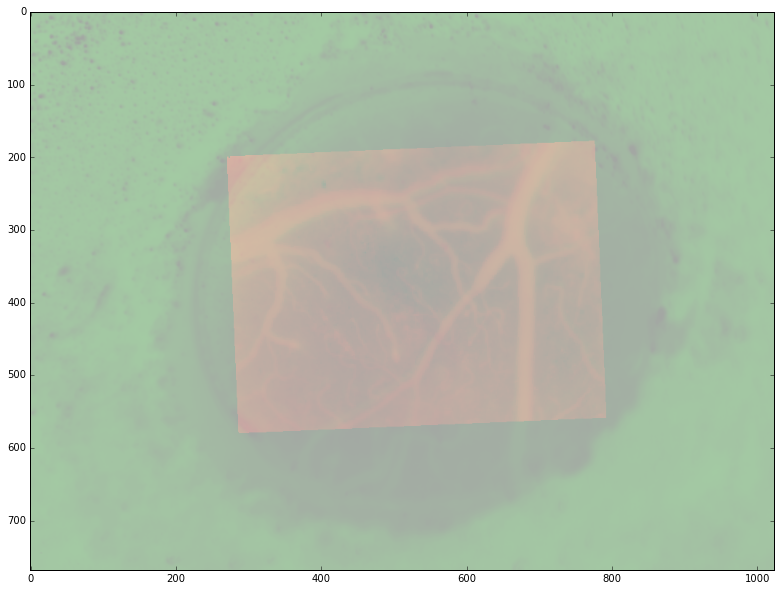

In [151]:

I1 = np.zeros((SAMPLE.shape[0], SAMPLE.shape[1], 3))
I1[:,:,1] = SAMPLE

I2 = np.zeros((SAMPLE.shape[0], SAMPLE.shape[1], 3))
I2[:,:,0] = out

plt.figure(figsize=(20,10))
plt.imshow(I1, alpha=0.2)
plt.imshow(I2, alpha=0.2)